In [18]:
# ] activate ../ 

In [1]:
using Revise
using POMDPs
using GridInterpolations 
using POMDPModelTools
using POMDPPolicies
using Parameters
using StaticArrays
using DiscreteValueIteration 
using Distributed
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using PedestrianAvoidancePOMDP

using FileIO
using JLD2

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.0\PedestrianAvoidancePOMDP\UuJ2S.ji for PedestrianAvoidancePOMDP [a80ff0fe-e6a0-11e8-3b05-15413bd5ea7a]
└ @ Base loading.jl:1190


In [2]:
# 1) choose betwenn only longitudinal
lateral_actions = [0.0]
# or lateral and longitudinal support
lateral_actions = [1, 0.0, -1]


# 2) choose good values for the policy
# good values are the longitudinal support are following
# COLLISION_COST = -60.0
# ACTION_LON_COST = 0.0
# ACTION_LAT_COST = 0.0
# KEEP_VELOCITY_REWARD = 10.0
# KEEP_LANE_REWARD = 0.0
# PROBABILITY_PEDESTRIAN_BIRTH = 0.4


pomdp = SingleOCFPOMDP(lateral_actions=lateral_actions)
pomdp.COLLISION_COST = -600.0
pomdp.ACTION_LON_COST = 0.0
pomdp.ACTION_LAT_COST = 0.0
pomdp.KEEP_VELOCITY_REWARD = 10.0
pomdp.KEEP_LANE_REWARD = 0.0
pomdp.PROBABILITY_PEDESTRIAN_BIRTH = 0.4
pomdp.γ = 0.95

println("POMDP with number of states: $(n_states(pomdp))")
# train policy
# if !isfile("transition.jld2")
#     transmat = DiscreteValueIteration.transition_matrix_a_s_sp(mdp)
#     FileIO.save("transition.jld2", "transmat", transmat)
# else
#     transmat = FileIO.load("transition.jld2")["transmat"]
# end
# function DiscreteValueIteration.transition_matrix_a_s_sp(::UnderlyingMDP{SingleOCFPOMDP,SingleOCFState,SingleOCFAction})
#     println("using existing transition matrix")
#     return transmat
# end
solver = SparseValueIterationSolver(max_iterations=200, belres=1e-4, include_Q=true, verbose=true)
mdp = UnderlyingMDP(pomdp);
vi_policy = solve(solver, mdp)
qmdp_policy = AlphaVectorPolicy(pomdp, vi_policy.qmat, vi_policy.action_map)

# save policy
FileIO.save("policy.jld2", "policy", qmdp_policy)


POMDP with number of states: 215326


┌ Info: residual: 600.0, time: 0.686789136, total time: 0.686789136 
│   i = 1
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 570.0000000000002, time: 0.417974518, total time: 1.104763654 
│   i = 2
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 541.5000000000001, time: 0.417230222, total time: 1.521993876 
│   i = 3
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 514.425, time: 0.434539457, total time: 1.956533333 
│   i = 4
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 488.70374999999973, time: 0.408885333, total time: 2.365418666 
│   i = 5
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 464.2685624999997, time: 0.443533827, total time: 2.808952493 
│   i = 6


┌ Info: residual: 1.0467395472326189, time: 0.462923852, total time: 23.075084246000003 
│   i = 45
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.9944025698709993, time: 0.401818469, total time: 23.476902715 
│   i = 46
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.944682441377438, time: 0.395213827, total time: 23.872116542 
│   i = 47
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.8974483193085803, time: 0.772049383, total time: 24.644165925 
│   i = 48
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.8525759033431655, time: 0.713130271, total time: 25.357296196 
│   i = 49
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.8099471081760043, time: 0.4364

┌ Info: residual: 0.11533301892015402, time: 0.379053828, total time: 43.57660483699999 
│   i = 88
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.10956636797416763, time: 0.589899456, total time: 44.16650429299999 
│   i = 89
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.10408804957546636, time: 0.410828642, total time: 44.57733293499999 
│   i = 90
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.09888364709669872, time: 0.370150716, total time: 44.947483650999985 
│   i = 91
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.09393946474187942, time: 0.378898173, total time: 45.32638182399999 
│   i = 92
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.0892

┌ Info: residual: 0.013376579723683335, time: 0.383157333, total time: 61.48345560299999 
│   i = 130
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.012707750737519063, time: 0.37904237, total time: 61.86249797299999 
│   i = 131
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.012072363200644531, time: 0.375401086, total time: 62.237899058999986 
│   i = 132
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.011468745040616568, time: 0.37286163, total time: 62.61076068899999 
│   i = 133
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.01089530778858716, time: 0.372025284, total time: 62.98278597299999 
│   i = 134
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual:

┌ Info: residual: 0.0015514454298397595, time: 0.352973037, total time: 78.80702459100003 
│   i = 172
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.0014738731583463505, time: 0.432728099, total time: 79.23975269000003 
│   i = 173
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.0014001795004219275, time: 0.36719605, total time: 79.60694874000004 
│   i = 174
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.0013301705254207263, time: 0.415586765, total time: 80.02253550500004 
│   i = 175
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: residual: 0.0012636619991894804, time: 0.634223408, total time: 80.65675891300003 
│   i = 176
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\dev\DiscreteValueIteration\src\sparse.jl:122
┌ Info: res

HTML{String}("    <script id=\"webio-setup-1612663912933055856\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-497346335242853273\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-1612663912933055856\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/03952b0695c7272134e96353bb6f24124f1c2aec-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/03952b0695c7272134e96353bb6f24124f1c2aec-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-497346335242853273\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

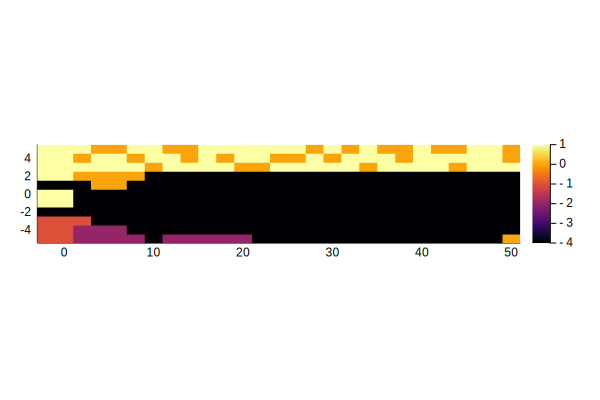

In [3]:
# visualize longitudinal policy 

using Interact
using Plots

gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

# @manipulate for ego_v in pomdp.EGO_V_RANGE
   ego_v = 30.0
#     @manipulate for ped_v in pomdp.PED_V_RANGE
   ped_v = 1.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.acc
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
#     end
# end


In [4]:
# visualize lateral policy

gr()


policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
   # ego_v = 8.0
    @manipulate for ped_v in pomdp.PED_V_RANGE
   # ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.lateral_movement
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:ego_v=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
15,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"7.0",:value=>Observable{Float64} with 2 listeners. Value:
7.0), Observable{Float64} with 2 listeners. Value:
7.0, Scope("knockout-component-59964e2d-46af-4300-a619-15e32871c075", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ego_v"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>29,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"7.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\Q4IkI\\src\\..\\assets\\all.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\Q4IkI\\src\\..\\assets\\style.css", "C:\\Users\\Maxime\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data =

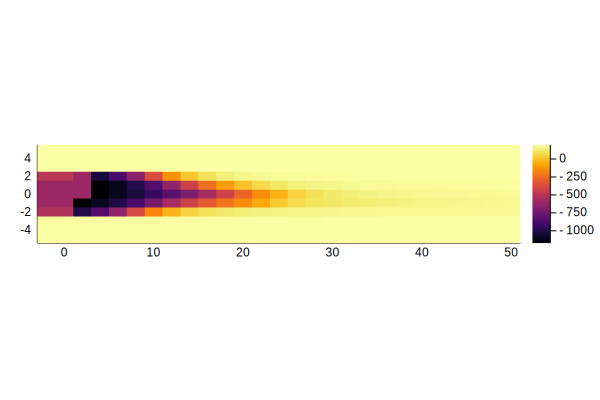

In [17]:
# visualize value function
value_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))
# @manipulate for ego_v in pomdp.EGO_V_RANGE
   ego_v = 50.0
#     @manipulate for ped_v in pomdp.PED_V_RANGE
   ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                val = maximum(PedestrianAvoidancePOMDP.action_values(qmdp_policy, b) )
                value_grid[i,j] = val
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,value_grid,aspect_ratio=1)
#     end
# end

In [33]:
b = SparseCat([SingleOCFState(0.0, 18.0, -10.0, -10.0, pomdp.PED_THETA_RANGE[1], 0.0)],[1.])
act = action(qmdp_policy, b) 
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy, b)

[0.0, 0.0]


5-element Array{Float64,1}:
 119.62642569538991
 121.62642569538991
 116.52130641815721
 119.30681732322287
 104.2855685664035 

In [ ]:
using Interact
using Plots
gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE

        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
                act = action(qmdp_policy, b) 
              #  println(ped_s, "/", ped_t, " act: ", act.acc)
                policy_grid[i,j] = act.lateral_movement
            end
        end

        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


In [24]:
# Test action space
cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = actionindex(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


[1.0, 0.0]
[0.0, 0.0]
[-1.0, 0.0]
[-2.0, 0.0]
[-4.0, 0.0]
0


In [ ]:
b = SingleOCFBelief([SingleOCFState(0.0, 5.0, 50.0, 3.0, 1.57, 0.0)], [1.0])
act = action(qmdp_policy, b) # policy
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy,b)
vi_policy.util[18223]

In [136]:
using PedestrianAvoidancePOMDP

s = SingleOCFState(0.0, 14, 50.0, -3.0, 1.57, 0.0)
sp = SingleOCFState(0.0, 14., 50.0, 0.0, 1.57, 0.0)
act = SingleOCFAction(0.0, 0.0)
print("reward: ", reward(pomdp, s, act, sp))

b = SparseCat([sp],[1.])
act = action(qmdp_policy, b) 


reward: 10.0

2-element SingleOCFAction:
 -2.0
  0.0